ссылка на страницу конкурса https://mlbootcamp.ru/round/12/sandbox/

В рамках конкурса вам нужно предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Считываем файл с данными для обучения
df = pd.read_csv('ssz_train.csv', sep=';')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Проверяем наличие пропусков
df.isnull().values.any()

False

In [5]:
#Проверяем тип данных
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
#Добавляем новый признак индекс массы тела
df['BMI'] = df.weight/(df.height/100)**2

In [7]:
#Добавляем новый признак разница между верхним и нижним давлением
df['diff_ap'] = df.ap_hi-df.ap_lo

In [8]:
#Меняю местами столбцы для удобства(чтобы новые признаки шли следом после тех, на основе которых они посчитаны)
cols = ['id', 'age', 'gender', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'diff_ap', 'cholesterol', 'gluc',
        'smoke', 'alco', 'active', 'cardio']
df = df[cols]

In [9]:
df.head()

,id,age,gender,height,weight,BMI,ap_hi,ap_lo,diff_ap,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,21.967120,110,80,30,1,1,0,0,1,0
1,1,20228,1,156,85.0,34.927679,140,90,50,3,1,0,0,1,1
2,2,18857,1,165,64.0,23.507805,130,70,60,3,1,0,0,0,1
3,3,17623,2,169,82.0,28.710479,150,100,50,1,1,0,0,1,1
4,4,17474,1,156,56.0,23.011177,100,60,40,1,1,0,0,0,0


In [10]:
#Удаляю столбец id за ненадобностью
df.drop('id', axis=1, inplace=True)

In [11]:
#Разделяю для анализа признаки на числовые и категориальные
numeric_features = ['age', 'height', 'weight', 'BMI', 'ap_hi', 'ap_lo', 'diff_ap']
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [12]:
#Основные характеристики числовых признаков
df[numeric_features].describe()

,age,height,weight,BMI,ap_hi,ap_lo,diff_ap
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,27.556513,128.817286,96.630414,32.186871
std,2467.251667,8.210126,14.395757,6.091511,154.011419,188.472530,241.469638
min,10798.000000,55.000000,10.000000,3.471784,-150.000000,-70.000000,-10800.000000
25%,17664.000000,159.000000,65.000000,23.875115,120.000000,80.000000,40.000000
50%,19703.000000,165.000000,72.000000,26.374068,120.000000,80.000000,40.000000
75%,21327.000000,170.000000,82.000000,30.222222,140.000000,90.000000,50.000000
max,23713.000000,250.000000,200.000000,298.666667,16020.000000,11000.000000,15940.000000


В глаза сразу бросаются выбросы, например максимальное давление ap_hi 16020. Явно есть некорректные записи в данных

In [13]:
import seaborn as sns

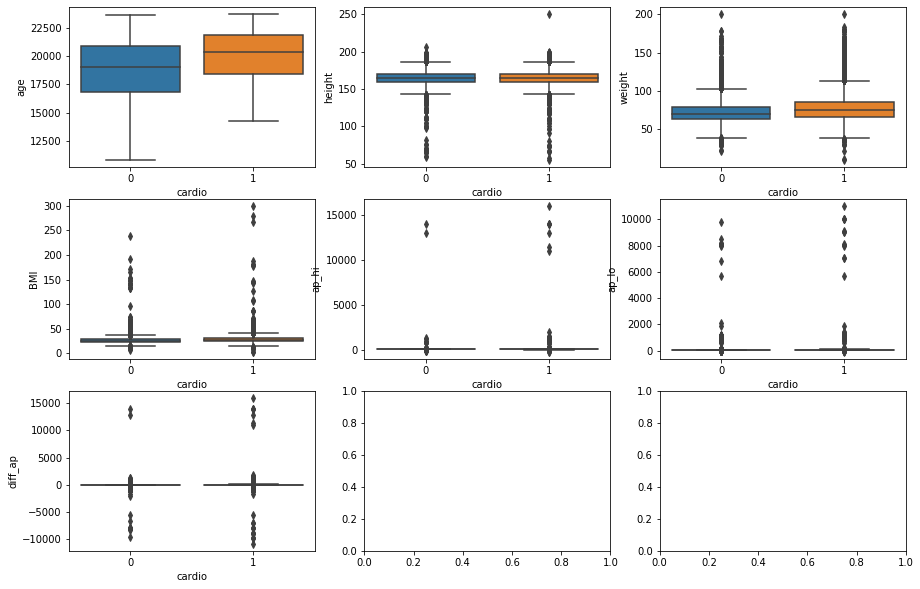

In [14]:
# Построим ящики с усама
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for i in range(len(numeric_features)):
    sns.boxplot(y = numeric_features[i], x='cardio', data = df, ax = axes[i//3, i%3])

Опять же заметны выбросы. К тому же из-за них некоторые графики кажутся совсем некорректными, например графики с 4 по 6-й, в них практически отсутствует интерквантильный размах из-за выбросов

In [15]:
df.shape

(70000, 14)

In [16]:
# Оставляем в дата фрейме только данные, которые теоретически возможны
df = df[(df.ap_hi<300) & (df.ap_lo<300) & (df.ap_hi>20) & (df.ap_lo>20)]
df = df[(df.diff_ap>0) & (df.BMI>10) & (df.BMI<80)]
df = df[(df.height<220)]

In [17]:
df.shape

(68641, 14)

Мы потеряли около 1400 строк. Как вариант, можно не удалять такие данные, а заменить значения в некорректных ячейках на средние по признакам. Но мои эксперименты в этом направлении не дал лучших результатов.

In [18]:
# Смотрим, как изменились характеристики после удаления явно некорректных данных
df[numeric_features].describe()

,age,height,weight,BMI,ap_hi,ap_lo,diff_ap
count,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000
mean,19464.611981,164.397110,74.110253,27.464843,126.672557,81.301452,45.371105
std,2468.125871,7.972032,14.283745,5.268893,16.692040,9.465369,11.676884
min,10798.000000,91.000000,28.000000,10.726644,60.000000,30.000000,5.000000
25%,17658.000000,159.000000,65.000000,23.875115,120.000000,80.000000,40.000000
50%,19701.000000,165.000000,72.000000,26.346494,120.000000,80.000000,40.000000
75%,21324.000000,170.000000,82.000000,30.119376,140.000000,90.000000,50.000000
max,23713.000000,207.000000,200.000000,74.380165,240.000000,182.000000,140.000000


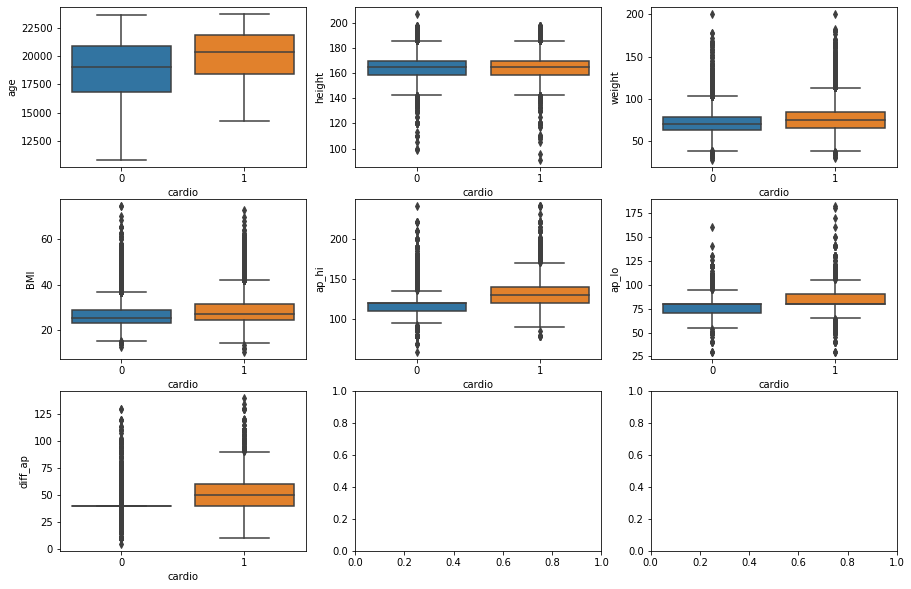

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
for i in range(len(numeric_features)):
    sns.boxplot(y = numeric_features[i], x='cardio', data = df, ax = axes[i//3, i%3])

По графикам можно просмотреть уже некоторые закономерности. Можно заметить, что есть различия в том, как распределен признак в зависимости от целевой метки, например age - у пациентов в более высоким риском (1) больший возраст. Различия можно заметить также в признаках weight, BMI, ap_hi, ap_lo

In [20]:
# Анализируем категориальные признаки
df[categorical_features].describe()

,gender,cholesterol,gluc,smoke,alco,active
count,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000,68641.000000
mean,1.348655,1.364665,1.225783,0.087950,0.053335,0.803383
std,0.476548,0.678884,0.571655,0.283225,0.224703,0.397443
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,2.000000,3.000000,3.000000,1.000000,1.000000,1.000000


[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210ABB922C8>


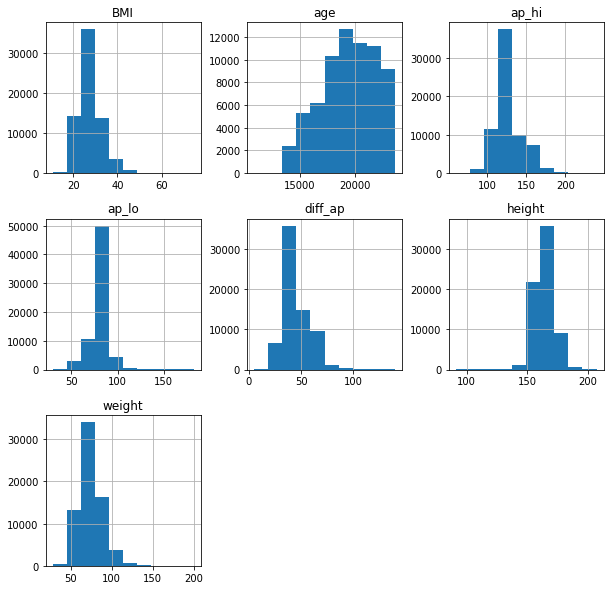

In [21]:
# Посморим как распределены признаки
print(df[numeric_features].hist(figsize = (10, 10)))

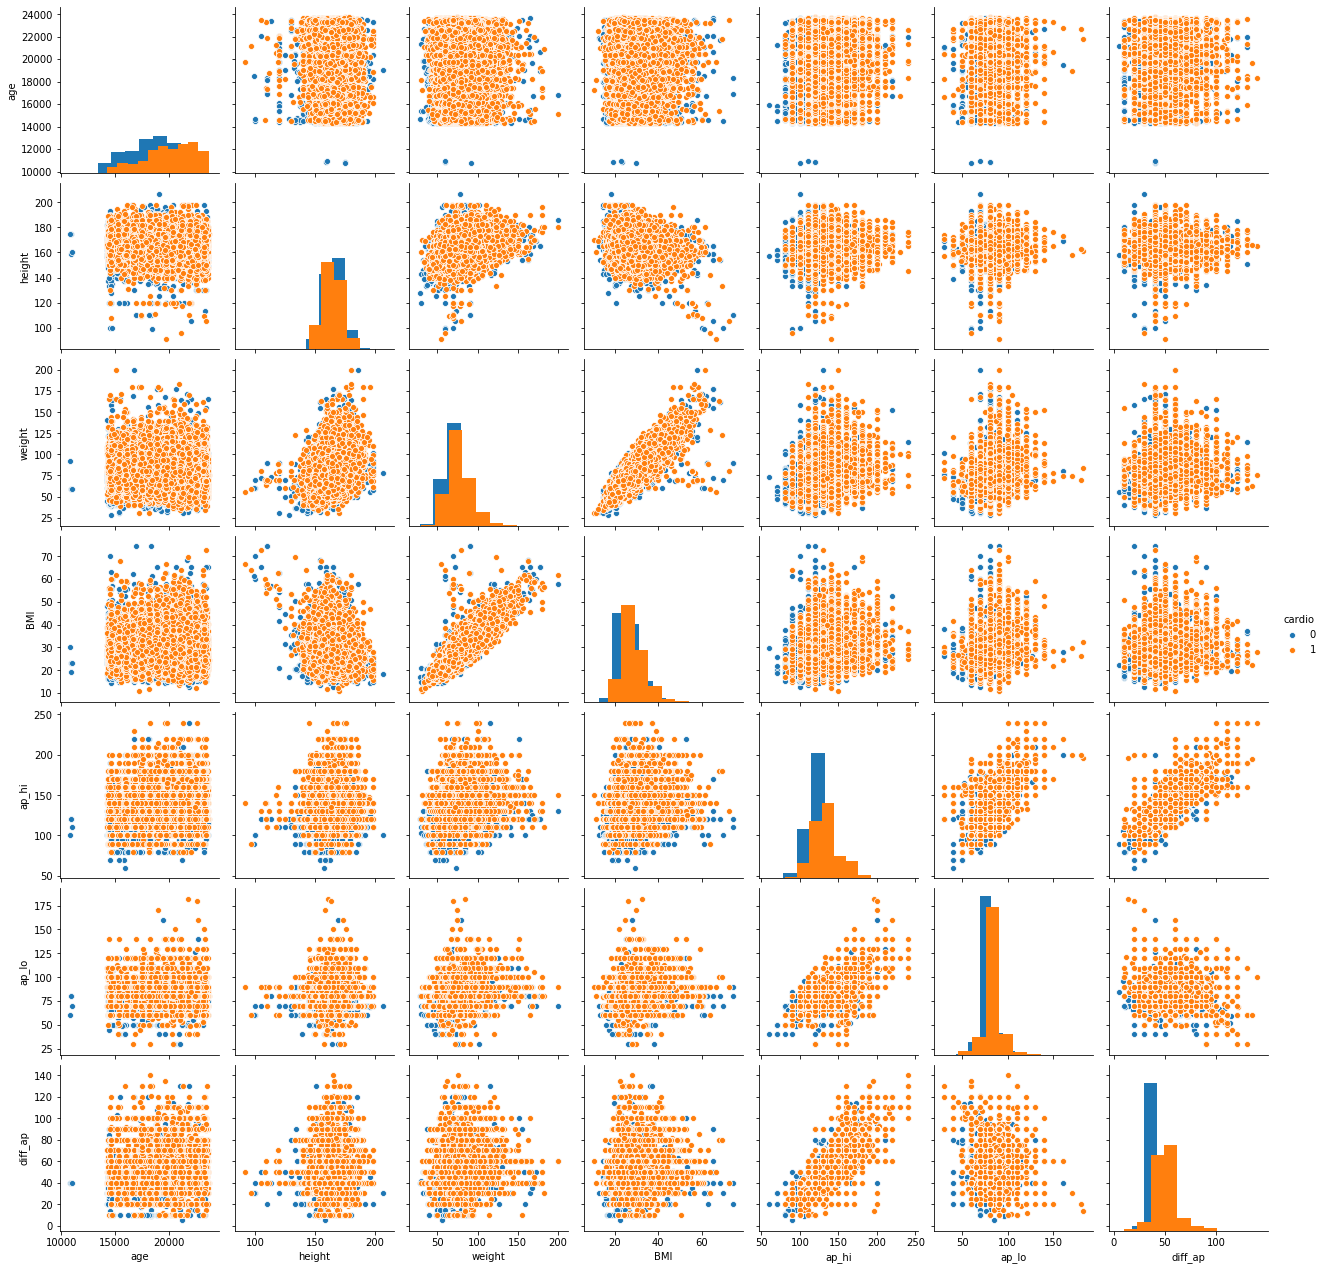

In [22]:
# Визуализируем признаки попарно
sns.pairplot(df[numeric_features + ['cardio']], diag_kind="hist", hue = 'cardio')

Можно заметить различия в распределениях гистограмм (синие и оранжевые столбики). Визуализация признаков попарно не позволяет выявить какие-то явные закономерности.

In [23]:
# Проверяем, есть ли сильная корреляция признаков
df[numeric_features + ['cardio']].corr()

,age,height,weight,BMI,ap_hi,ap_lo,diff_ap,cardio
age,1.000000,-0.084300,0.055297,0.101508,0.209585,0.156312,0.172893,0.239408
height,-0.084300,1.000000,0.306688,-0.217552,0.019724,0.037220,-0.001976,-0.011768
weight,0.055297,0.306688,1.000000,0.855295,0.270584,0.252694,0.181963,0.179937
BMI,0.101508,-0.217552,0.855295,1.000000,0.264517,0.237531,0.185581,0.188681
ap_hi,0.209585,0.019724,0.270584,0.264517,1.000000,0.733776,0.834690,0.428086
ap_lo,0.156312,0.037220,0.252694,0.237531,0.733776,1.000000,0.238321,0.339678
diff_ap,0.172893,-0.001976,0.181963,0.185581,0.834690,0.238321,1.000000,0.336601
cardio,0.239408,-0.011768,0.179937,0.188681,0.428086,0.339678,0.336601,1.000000


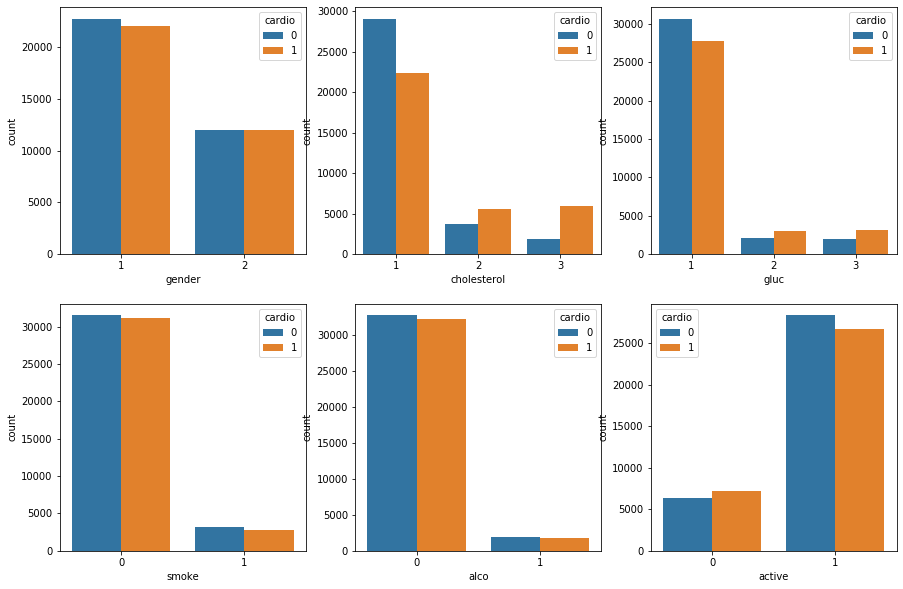

In [24]:
# Построим countplot категориальных признаков
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(2, 3, figsize = (15, 10))
for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], data = df, ax = axes[i//3, i%3], hue = 'cardio')

Можно заметить влияние таких показателей как холестерин, глюкоза. Прослеживается также незначительное влияние признаков smoke, alko. Эти данные собирались со слов самих пациентов, поэтому в них нет уверенности. Возможно, если бы эти показатели замерялись как то по другому, то картина была бы более ярко выражена. Аналогичная, но более явная закономерность прослеживается по признаку active

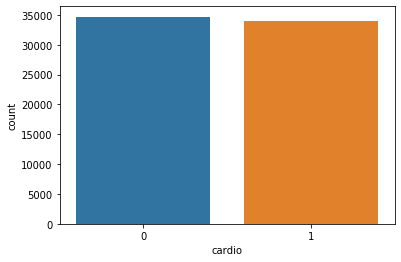

In [25]:
#Распределение целевого признака
sns.countplot(df.cardio)

In [26]:
# Разделим данные на целевую переменную и обучение
data = df[numeric_features+categorical_features]
labels = df.cardio

In [27]:
from sklearn import model_selection

In [28]:
# Разбиваем данные на обучающую выборку и тестовую
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, labels, test_size = 0.3, 
                                                                                    stratify=df.cardio, random_state = 23)

In [29]:
# Масштабируем вещественные признаки (необходимо для логистической регрессии)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
# StandardScaler не принимает на вход пандас фреймы, поэтому перевожу в нумпай
train_data = train_data.to_numpy()
test_data = test_data.to_numpy();

In [31]:
# Масштабировать необходимо только вещественные признаки, поэтому разбиваю данные
train_data_numeric = train_data[:, 0:7]
test_data_numeric = test_data[:, 0:7]
train_data_categoricalc = train_data[:, -6:]
test_data_categorical = test_data[:, -6:]

In [32]:
# Масштабирую
scaler.fit(train_data_numeric)
scaler_train_data = scaler.transform(train_data_numeric)
scaler_test_data = scaler.transform(test_data_numeric)

In [33]:
# Объединяю вещественные и категориальные признаки
train_data = np.hstack((scaler_train_data, train_data_categoricalc))
test_data = np.hstack((scaler_test_data, test_data_categorical))

Можно было бы сделать проще - отмасштабировать данные на всех данных, а уже потом разбить через train_test_split. Но это будет неправильно, в таком случае подсчитанные на тесте метрики качества будут давать смещенные оценки на качество алгоритма.

In [34]:
# На всякий случай проверяю, все верно сделано, смотрю визуально
df_all = pd.DataFrame(train_data, columns=numeric_features+categorical_features)
df_all.head()

,age,height,weight,BMI,ap_hi,ap_lo,diff_ap,gender,cholesterol,gluc,smoke,alco,active
0,0.098321,0.572202,-0.921826,-1.159737,2.613930,0.922484,2.986585,1.0,2.0,2.0,0.0,0.0,0.0
1,-0.457723,0.322218,1.390333,1.180825,-0.400006,-0.135915,-0.461311,2.0,1.0,1.0,0.0,0.0,1.0
2,-0.481583,0.072233,-0.851761,-0.891434,-0.400006,-0.135915,-0.461311,1.0,1.0,1.0,0.0,0.0,1.0
3,-0.496545,0.572202,-0.991892,-1.226108,-1.605581,-2.252711,-0.461311,1.0,1.0,1.0,0.0,0.0,1.0
4,1.563850,0.197225,-0.221172,-0.324166,0.202781,-0.135915,0.400663,1.0,1.0,1.0,0.0,0.0,1.0


##### Используем логистическую регрессию для построения модели, подбираем параметр регуляризации

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

In [36]:
param_grid = {'C' : [0.05, 0.1, 0.3, 0.5, 0.6, 1, 10]}

In [37]:
estimator = LogisticRegression()
optimizer = GridSearchCV(estimator, param_grid, cv = 3, scoring = 'neg_log_loss')

In [38]:
%%time
optimizer.fit(train_data, train_labels)

Wall time: 1.5 s


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.3, 0.5, 0.6, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [39]:
optimizer.best_params_

{'C': 0.05}

In [40]:
optimizer.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# качество на тестовой выборке
log_loss(test_labels, optimizer.best_estimator_.predict_proba(test_data)[:,1])

0.557650920733186

##### Проверю качество модели с наилучним параметром регуляризации на всех доступных данных крос-валидацией

In [42]:
# Масштабирую вещественные признаки во всех имеющихся данных
data = data.to_numpy()
data_numeric = data[:, 0:7]
data_categoricalc = data[:, -6:]
scaler.fit(data_numeric)
scaler_data = scaler.transform(data_numeric)
data = np.hstack((scaler_data, data_categoricalc))

In [43]:
# Оцениваю качество на валидации
log_regressor = LogisticRegression(random_state = 1, C = 0.05)
log_scoring =  model_selection.cross_val_score(log_regressor, data, labels, scoring = 'neg_log_loss', cv = 3)
print(log_scoring.mean(), log_scoring.std())

-0.5605738509341108 0.0021986857861223644


#### Поэкспериментирую, посмотрю как изменится качество если применить onehot_encoder к категориальным признакам

In [44]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
hot_data_categoricalc = encoder.fit_transform(data_categoricalc)

In [45]:
print(data_categoricalc.shape)
print(hot_data_categoricalc.shape)

(68641, 6)
(68641, 14)


In [46]:
hot_data = np.hstack((scaler_data, hot_data_categoricalc))

In [47]:
param_grid = {'C' : [0.05, 0.1, 0.3, 0.5, 0.6, 1, 10]}
hot_estimator = LogisticRegression()
hot_optimizer = GridSearchCV(hot_estimator, param_grid, cv = 3, scoring = 'neg_log_loss')
hot_optimizer.fit(hot_data, labels)
hot_optimizer.best_params_

{'C': 0.1}

In [48]:
hot_log_scoring =  model_selection.cross_val_score(hot_optimizer.best_estimator_, hot_data, labels, scoring = 'neg_log_loss', cv = 3)
print(hot_log_scoring.mean(), hot_log_scoring.std())

-0.5603189524589356 0.002282160787784506


Метрика улучшилась на две десятитысячных, возможно эта разница даже статистически не значима(как-нибудь может проверю это). 
Но как бы то ни было буду использовать эту модель

В дальнейшем хочу посмотреть, какие результаты даст блендинг. Поэтому обучу модель на тестовых данных(полученных путем разбиения имеющегося фрейма), сделаю предсказания на тестовых сданных. Применю OneHotEncoder.

In [49]:
hot_data = df[numeric_features+categorical_features]
labels = df.cardio
hot_train_data, hot_test_data, hot_train_labels, hot_test_labels = model_selection.train_test_split(hot_data, labels, 
                                                                    test_size = 0.3, stratify=df.cardio, random_state = 23)

In [50]:
hot_train_data = hot_train_data.to_numpy()
hot_test_data = hot_test_data.to_numpy();

In [51]:
hot_train_data_numeric = hot_train_data[:, 0:7]
hot_test_data_numeric = hot_test_data[:, 0:7]
hot_train_data_categoricalc = hot_train_data[:, -6:]
hot_test_data_categorical = hot_test_data[:, -6:]

In [52]:
scaler.fit(hot_train_data_numeric)
hot_scaler_train_data = scaler.transform(hot_train_data_numeric)
hot_scaler_test_data = scaler.transform(hot_test_data_numeric)
encoder = OneHotEncoder(sparse=False)
hot_train_data_categoricalc = encoder.fit_transform(hot_train_data_categoricalc)
hot_test_data_categoricalc = encoder.transform(hot_test_data_categorical)

In [53]:
hot_train_data = np.hstack((hot_scaler_train_data, hot_train_data_categoricalc))
hot_test_data = np.hstack((hot_scaler_test_data, hot_test_data_categoricalc))

In [54]:
log_regressor = LogisticRegression(random_state = 1, C = 0.01, n_jobs = -1)
log_regressor.fit(hot_train_data, train_labels)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [55]:
log_loss(test_labels,  log_regressor.predict_proba(hot_test_data)[:,1])

0.5575257367563476

In [56]:
# Запишу предсказания лог регрессии на тесте в переменную, сохраню в файл
log = pd.DataFrame(log_regressor.predict_proba(hot_test_data)[:,1])
log.to_csv('log.csv', header=False, index=False)

В переменную out_data заносим данные, которые используются в качестве теста на конкурсе. Проводим с ними те же манипуляции, что и с основными данными, получаем на них предсказания по обученным моделям

Сначала сделаю масштабирование без OneHotEncoder

In [57]:
out_data = pd.read_csv('ssz_test.csv', sep=';', na_values='None')

In [58]:
out_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0.0,0.0,1.0
1,6,19042,2,170,69.0,130,90,1,1,NaN,0.0,1.0
2,7,20432,1,160,70.0,120,75,1,1,0.0,0.0,0.0
3,10,18133,2,185,94.0,130,90,1,1,NaN,0.0,1.0
4,11,16093,2,170,76.0,120,80,1,1,0.0,0.0,1.0


In [59]:
df.isnull().values.any()

False

Согласно условиям в тестовом датасете есть пропущенные значения в призках smoke, alco, active (те, что собраны на основании слов самих пациентов). Заполню эти пропуски случайными числами

In [60]:
out_data.fillna(int(np.random.randint(0, 2, 1, dtype='int')) , inplace=True)

In [61]:
out_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0.0,0.0,1.0
1,6,19042,2,170,69.0,130,90,1,1,0.0,0.0,1.0
2,7,20432,1,160,70.0,120,75,1,1,0.0,0.0,0.0
3,10,18133,2,185,94.0,130,90,1,1,0.0,0.0,1.0
4,11,16093,2,170,76.0,120,80,1,1,0.0,0.0,1.0


In [62]:
out_data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke          float64
alco           float64
active         float64
dtype: object

In [63]:
out_data['BMI'] = out_data.weight/(out_data.height/100)**2
out_data['diff_ap'] = out_data.ap_hi-out_data.ap_lo

In [64]:
out_data = out_data[numeric_features+categorical_features]

In [65]:
# StandardScaler не принимает на вход пандас фреймы, поэтому перевожу в нумпай
out_data = out_data.to_numpy()

In [66]:
# Масштабировать необходимо только вещественные признаки, поэтому разбиваю данные
out_data_numeric = out_data[:, 0:7]
out_data_categorical = out_data[:, -6:]

In [67]:
# Масштабирую
scaler.fit(data_numeric)
scaler_out_data = scaler.transform(out_data_numeric)

In [68]:
# Объединяю вещественные и категориальные признаки
out_data = np.hstack((scaler_out_data, out_data_categorical))

In [69]:
# На всякий случай проверяю, все верно сделано, смотрю визуально
df_out_all = pd.DataFrame(out_data, columns=numeric_features+categorical_features)
df_out_all.head()

,age,height,weight,BMI,ap_hi,ap_lo,diff_ap,gender,cholesterol,gluc,smoke,alco,active
0,-0.233625,-1.304208,0.762393,1.589708,0.199345,-0.137497,0.396418,1.0,1.0,1.0,0.0,0.0,1.0
1,-0.171229,0.702824,-0.357770,-0.681251,0.199345,0.918993,-0.459981,2.0,1.0,1.0,0.0,0.0,1.0
2,0.391955,-0.551571,-0.287759,-0.022983,-0.399748,-0.665742,-0.031781,1.0,1.0,1.0,0.0,0.0,0.0
3,-0.539527,2.584415,1.392484,0.000087,0.199345,0.918993,-0.459981,2.0,1.0,1.0,0.0,0.0,1.0
4,-1.366072,0.702824,0.132301,-0.221541,-0.399748,-0.137497,-0.459981,2.0,1.0,1.0,0.0,0.0,1.0


In [70]:
# обучаем логистическую регрессию на всех доступных данных
estimator_log = LogisticRegression()
param_grid = {'C' : [0.05, 0.1, 0.3, 0.5, 0.6, 1, 10]}
optimizer_log = GridSearchCV(estimator_log, param_grid, cv = 3, scoring = 'neg_log_loss')
optimizer_log.fit(data, labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.05, 0.1, 0.3, 0.5, 0.6, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [71]:
optimizer_log.best_params_

{'C': 0.05}

In [72]:
# Получаем предсказания на основе полученной модели
log_test = pd.DataFrame(optimizer_log.best_estimator_.predict_proba(out_data)[:,1])
log_test.to_csv('log_test.csv', header=False, index=False)

Результат, полученный на сайте
П: 0.5964836
Ф: 0.5952505

Применю к тестовым данным OneHotEncoder и посмотрю как изменится результат

In [73]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(data_categoricalc)
hot_out_data_categoricalc = encoder.transform(out_data_categorical)
hot_out_data = np.hstack((scaler_out_data, hot_out_data_categoricalc))

In [74]:
# Получаем предсказания? обученная модель у меня уже есть
log_test_hot = pd.DataFrame(hot_optimizer.best_estimator_.predict_proba(hot_out_data)[:,1])
log_test_hot.to_csv('log_test_hot.csv', header=False, index=False)

Результат, полученный на сайте П: 0.5961646
Ф: 0.5948055

Немного улучшился

#### Посмотрим как сработет Случайный лес

In [75]:
from sklearn.ensemble import RandomForestClassifier

Деревьев сделаю побольше, остальные параметры оставлю по умолчанию

In [76]:
%%time
rf_classifier_all = RandomForestClassifier(n_estimators = 1500, random_state = 11, n_jobs = -1)
rf_classifier_all.fit(data, labels)
rf_scoring_all =  model_selection.cross_val_score(rf_classifier_all, data, labels, scoring = 'neg_log_loss', cv = 3)
print(rf_scoring_all.mean(), rf_scoring_all.std())

-0.5828079532976371 0.0023061922582419195
Wall time: 49.1 s


Качество хуже чем при логистической регрессии

In [77]:
# Посмотрим какая метрика будет на тесте сайта
rf_test = pd.DataFrame(rf_classifier_all.predict_proba(out_data)[:,1])
rf_test.to_csv('rf_test.csv', header=False, index=False)

Результат, полученный на сайте П: 0.5882293
Ф: 0.5754472

Результат полученный при случайном лесе на сайте лучше, чем при логистической регрессии. Также нет большого расхождения при использовании случайного леса между результатами на крос валидации и рез-ми на сайте, в отличии от логистической регрессии. Возможно при применении логистической регрессии я допустил какие-то ошибки в обработке данных.

In [78]:
# Обучу модель на тестовых данных(полученных разбиением доступного датасета), 
# запишу результат на тесте в переменную, чтобы пименить блендинг
rf_classifier = RandomForestClassifier(n_estimators = 1500, random_state = 11, n_jobs = -1)
rf_classifier.fit(train_data, train_labels)
log_loss(test_labels, rf_classifier.predict_proba(test_data)[:,1])

0.5816356160086426

In [79]:
rf = pd.DataFrame(rf_classifier.predict_proba(test_data)[:,1])
rf.to_csv('rf.csv', header=False, index=False)

#### Посмотрим как сработает такой простой метод как Kmeans

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
%%time
# обучаем на всех доступных данных
param_grid = {'n_neighbors' : [60, 65, 70]}
estimator_kn_all = KNeighborsClassifier(weights='uniform', n_jobs = -1)
optimizer_kn_all = GridSearchCV(estimator_kn_all, param_grid, cv = 3)
optimizer_kn_all.fit(data, labels)
optimizer_kn_all.best_params_

Wall time: 16.7 s


{'n_neighbors': 65}

In [82]:
kn_scoring_all =  model_selection.cross_val_score(optimizer_kn_all.best_estimator_, data, labels, scoring = 'neg_log_loss', cv = 3)
print(kn_scoring_all.mean(), kn_scoring_all.std())

-0.5496516234865906 0.0024403831167196547


In [83]:
kn_test = pd.DataFrame(optimizer_kn_all.best_estimator_.predict_proba(out_data)[:,1])
kn_test.to_csv('kn_test.csv', header=False, index=False)

Результат, полученный на сайте П: 0.5551280
Ф: 0.5431550

Довольно неплохой результат

In [84]:
# Обучу модель на тестовых данных(полученных разбиением доступного датасета), 
# запишу результат на тесте в переменную, чтобы пименить блендинг
estimator_kn = KNeighborsClassifier(weights='uniform', n_jobs = -1)
optimizer_kn = GridSearchCV(estimator_kn, param_grid, cv = 3)
optimizer_kn.fit(train_data, train_labels)
optimizer_kn.best_params_

{'n_neighbors': 65}

In [85]:
log_loss(test_labels, optimizer_kn.best_estimator_.predict_proba(test_data)[:,1])

0.5475422176234065

In [86]:
kn = pd.DataFrame(optimizer_kn.best_estimator_.predict_proba(test_data)[:,1])
kn.to_csv('kn.csv', header=False, index=False)

#### Посмотрим на что способен градиентный бустинг

Получаем предсказания на основании модели Градиентный бустинг. Подбор параметров(скорость обучения, количество деревьев, глубина) не дали лучших результатов чем настройки по умолчанию, поэтому используем их

In [87]:
import xgboost as xgb

In [88]:
estimator_xgb_all = xgb.XGBClassifier()
estimator_xgb_all.fit(data, labels)
xgb_scoring_all =  model_selection.cross_val_score(estimator_xgb_all, data, labels, scoring = 'neg_log_loss', cv = 3)
print(xgb_scoring_all.mean(), xgb_scoring_all.std())

-0.5414101279684934 0.0016798614601410676


Результат, полученный на сайте П: 0.5453070
Ф: 0.5338796

Самый лучший результат

In [89]:
xgb_test = pd.DataFrame(estimator_xgb_all.predict_proba(out_data)[:,1])
xgb_test.to_csv('xgb_test.csv', header=False, index=False)

In [90]:
# Обучу модель на тестовых данных(полученных разбиением доступного датасета), 
# запишу результат на тесте в переменную, чтобы применить блендинг
estimator_xgb = xgb.XGBClassifier()
estimator_xgb.fit(train_data, train_labels)
log_loss(test_labels, estimator_xgb.predict_proba(test_data))

0.5390208550546465

In [91]:
xg = pd.DataFrame(estimator_xgb.predict_proba(test_data)[:,1])
xg.to_csv('xg.csv', header=False, index=False)

In [92]:
# Усредню результаты всех 4-х моделей
mean_rez_1 = (log_test + rf_test + kn_test + xgb_test)/4
mean_rez_1.to_csv('mean_rez_1.csv', header=False, index=False)
# Результат на сайте: П 0.5487862 Ф: 0.5385119
# Немного хуже, чем просто xgb

In [93]:
# Усредню результаты всех 2-х моделей(xgb и knn)
mean_rez_2 = (kn_test + xgb_test)/2
mean_rez_2.to_csv('mean_rez_2.csv', header=False, index=False)
# Результат на сайте: П: 0.5473098 Ф: 0.5356907
# Лучше, чем усреднение 4-х моделей, но все равно хуже сингл модели

#### Применю блендинг, посмотрим какие он даст результаты

In [94]:
# запишу предчказания по обучающей выборке в переменные
log = pd.read_csv('log.csv', names=['log'])
rf = pd.read_csv('rf.csv', names=['rf'])
kn = pd.read_csv('kn.csv', names=['kn'])
xg = pd.read_csv('xg.csv', names=['xg'])

In [95]:
# запишу предчказания по итоговой тестовой выборке в переменные
log_test = pd.read_csv('log_test.csv', names=['log'])
rf_test = pd.read_csv('rf_test.csv', names=['rf'])
kn_test = pd.read_csv('kn_test.csv', names=['kn'])
xgb_test = pd.read_csv('xgb_test.csv', names=['xg'])

In [96]:
# Создаю фрейм на основе мета признаков
meta_train = pd.concat([log, rf, kn, xg], axis = 1) 
meta_test = pd.concat([log_test, rf_test, kn_test, xgb_test], axis = 1)

In [97]:
meta_train.head()

,log,rf,kn,xg
0,0.254170,0.428000,0.292308,0.260227
1,0.590898,0.903333,0.784615,0.795737
2,0.409475,0.887333,0.707692,0.565878
3,0.056367,0.040000,0.092308,0.091063
4,0.363423,0.054000,0.307692,0.293749


In [98]:
import xgboost as xgb
estimator_meta = xgb.XGBClassifier()
estimator_meta.fit(meta_train, test_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [99]:
xgb_meta = pd.DataFrame(estimator_meta.predict_proba(meta_test)[:,1])
xgb_meta.to_csv('xgb_meta.csv', header=False, index=False)

Результат, полученный на сайте П: 0.5489494
Ф: 0.5355218

Блендинг не дал улучшения, наилучшая модель на данный момент xgboost.
По финальным результатам в песочнице моя метрика 0.5338796, у лидера она составляет 0.5301026